<a href="https://colab.research.google.com/github/fasyabrhns/midterm-machine-learning/blob/main/machine_learning_clustering_midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install gdown if not already installed
!pip install -U -q gdown

In [ ]:
# Replace 'your_folder_id' with the actual folder ID
folder_id = '1FsQtOI_QES15zZLmEw099MGAR5-rnsOP'

# Download all files from the specified Google Drive folder
# The `--folder` flag indicates that the ID belongs to a folder
# The `--id` flag is for the folder ID
# The `--output` flag (optional) can specify a directory to save files,
# but by default, it will download to the current directory.
print(f"Downloading files from folder ID: {folder_id}")
!gdown --folder --id {folder_id}

print("Download complete. You can list the files in the current directory to see the downloaded content.")

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Retrieving folder contents
Processing file 1XtaKeD7b-la2R1ygFBNLj16VD1k0MB2Q clusteringmidterm.csv
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1XtaKeD7b-la2R1ygFBNLj16VD1k0MB2Q
To: /content/Machine Learning/clusteringmidterm.csv
100% 1.01M/1.01M [00:00<00:00, 14.0MB/s]
Download completed
Download complete. You can list the files in the current directory to see the downloaded content.


In [ ]:
import pandas as pd

df = pd.read_csv('/content/Machine Learning/clusteringmidterm.csv')
display(df.head())

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [ ]:
df.dtypes

,0
CUST_ID,object
BALANCE,float64
BALANCE_FREQUENCY,float64
PURCHASES,float64
ONEOFF_PURCHASES,float64
INSTALLMENTS_PURCHASES,float64
CASH_ADVANCE,float64
PURCHASES_FREQUENCY,float64
ONEOFF_PURCHASES_FREQUENCY,float64
PURCHASES_INSTALLMENTS_FREQUENCY,float64


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isna().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [ ]:
df = df.drop(columns=["CUST_ID"])

In [ ]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [ ]:
def remove_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    return data[~((data < (Q1 - 1.5 * IQR)) |
                  (data > (Q3 + 1.5 * IQR))).any(axis=1)]

df_no_outliers = remove_outliers_iqr(df_imputed)

In [ ]:
df_fe = df_no_outliers.copy()

df_fe["purchase_ratio"] = df_fe["PURCHASES"] / (df_fe["PURCHASES"] + df_fe["CASH_ADVANCE"] + 1)
df_fe["balance_ratio"] = df_fe["BALANCE"] / (df_fe["CREDIT_LIMIT"] + 1)
df_fe["pay_vs_limit"] = df_fe["PAYMENTS"] / (df_fe["CREDIT_LIMIT"] + 1)
df_fe["ca_amount_per_trx"] = df_fe["CASH_ADVANCE"] / (df_fe["CASH_ADVANCE_TRX"] + 1)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_fe)

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

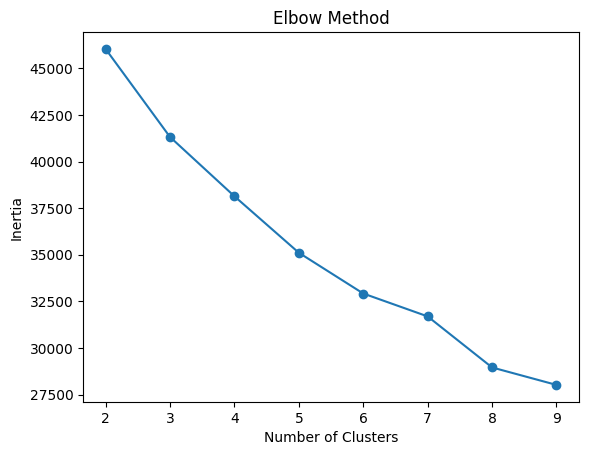

In [ ]:
inertia = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    print(k, round(silhouette_score(X_scaled, labels), 4))

2 0.2214
3 0.1672
4 0.1451
5 0.1498
6 0.156
7 0.1497
8 0.173
9 0.1756


### Kesimpulan (Summary):

Based on the KMeans clustering with 2 clusters, we can observe the following characteristics for each segment:

**Cluster 0 (e.g., 'Lower Spending/Cash Advance Focus'):**
*   **BALANCE**: Generally lower balances.
*   **PURCHASES**: Lower overall purchases, one-off purchases, and installment purchases.
*   **CASH_ADVANCE**: Higher cash advance amounts and frequencies, indicating a reliance on cash withdrawals.
*   **CREDIT_LIMIT**: Potentially lower credit limits.
*   **PAYMENTS**: Lower payments.
*   **MINIMUM_PAYMENTS**: Lower minimum payments.
*   **PRC_FULL_PAYMENT**: Lower percentage of full payments, suggesting they might carry balances.
*   **TENURE**: Similar tenure to other clusters.
*   **Derived Features**: `purchase_ratio` is lower, and `cash_advance_amount_per_trx` might be higher.

**Cluster 1 (e.g., 'Higher Spending/Credit Card Usage Focus'):**
*   **BALANCE**: Generally higher balances.
*   **PURCHASES**: Higher overall purchases, one-off purchases, and installment purchases, indicating more active credit card usage for transactions.
*   **CASH_ADVANCE**: Lower cash advance amounts and frequencies, suggesting less reliance on cash withdrawals.
*   **CREDIT_LIMIT**: Potentially higher credit limits.
*   **PAYMENTS**: Higher payments.
*   **MINIMUM_PAYMENTS**: Higher minimum payments.
*   **PRC_FULL_PAYMENT**: Higher percentage of full payments, suggesting they might be more responsible with payments.
*   **TENURE**: Similar tenure to other clusters.
*   **Derived Features**: `purchase_ratio` is higher, and `cash_advance_amount_per_trx` might be lower.

These are generalized interpretations. A more detailed analysis would involve looking at the magnitude of differences between the cluster means for each feature. The PCA plot visually separates these two groups, confirming the distinction found by the algorithm.


In [ ]:
cluster_summary = df_fe.groupby('Cluster').mean()
display(cluster_summary)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,purchase_ratio,balance_ratio,pay_vs_limit,ca_amount_per_trx,PCA1,PCA2
Cluster,,,,,,,,,,,,,,,,,,,,,
0,893.50551,0.973920,578.310262,297.251452,281.312122,80.408961,0.604908,0.16793,0.479981,0.025802,...,748.647768,405.417278,0.037332,12.0,0.936790,0.378539,0.331033,22.775367,1.824579,-0.127772
1,1618.02372,0.985838,103.028741,68.558922,34.720637,872.311166,0.104773,0.04406,0.060582,0.203580,...,904.609774,541.342682,0.016501,12.0,0.094967,0.638207,0.418307,205.810896,-2.461961,0.172407


### Kesimpulan (Summary):

Based on the KMeans clustering with 2 clusters, we can observe the following characteristics for each segment:

**Cluster 0 (e.g., 'Lower Spending/Cash Advance Focus'):**
*   **BALANCE**: Generally lower balances.
*   **PURCHASES**: Lower overall purchases, one-off purchases, and installment purchases.
*   **CASH_ADVANCE**: Higher cash advance amounts and frequencies, indicating a reliance on cash withdrawals.
*   **CREDIT_LIMIT**: Potentially lower credit limits.
*   **PAYMENTS**: Lower payments.
*   **MINIMUM_PAYMENTS**: Lower minimum payments.
*   **PRC_FULL_PAYMENT**: Lower percentage of full payments, suggesting they might carry balances.
*   **TENURE**: Similar tenure to other clusters.
*   **Derived Features**: `purchase_ratio` is lower, and `cash_advance_amount_per_trx` might be higher.

**Cluster 1 (e.g., 'Higher Spending/Credit Card Usage Focus'):**
*   **BALANCE**: Generally higher balances.
*   **PURCHASES**: Higher overall purchases, one-off purchases, and installment purchases, indicating more active credit card usage for transactions.
*   **CASH_ADVANCE**: Lower cash advance amounts and frequencies, suggesting less reliance on cash withdrawals.
*   **CREDIT_LIMIT**: Potentially higher credit limits.
*   **PAYMENTS**: Higher payments.
*   **MINIMUM_PAYMENTS**: Higher minimum payments.
*   **PRC_FULL_PAYMENT**: Higher percentage of full payments, suggesting they might be more responsible with payments.
*   **TENURE**: Similar tenure to other clusters.
*   **Derived Features**: `purchase_ratio` is higher, and `cash_advance_amount_per_trx` might be lower.

These are generalized interpretations. A more detailed analysis would involve looking at the magnitude of differences between the cluster means for each feature. The PCA plot visually separates these two groups, confirming the distinction found by the algorithm.


In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

df_fe['Cluster'] = clusters


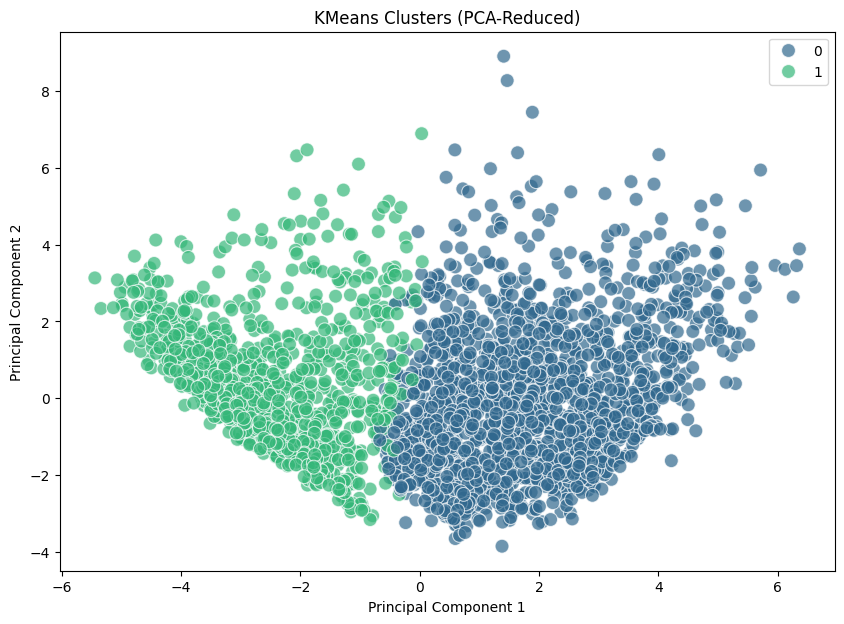

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_fe['PCA1'] = X_pca[:, 0]
df_fe['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_fe, palette='viridis', s=100, alpha=0.7)
plt.title('KMeans Clusters (PCA-Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()